In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('style')

from pathlib import Path
fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, ext="pdf"):
    from pathlib import Path
    import matplotlib.pyplot as plt

    fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
    fig_dir.mkdir(parents=True, exist_ok=True)
    path = fig_dir / f"{name}.{ext}"
    plt.savefig(path, bbox_inches="tight", dpi=300, pad_inches = 0.1)
    print(f"✅ Figura guardada en {path}")


file_names = ['spectrum_xi_008.txt', 'spectrum_xi_015.txt', 'spectrum_xi_018.txt', 'spectrum_xi_02.txt' ]

# 📄 Lista para guardar los DataFrames
all_dataframes = []

for name in file_names:
    print(f"Cargando {name}...")
    try:
        # Lee la primera línea para obtener los headers
        with open(name, 'r') as f:
            first_line = f.readline().strip()
            # Quita el '#' y divide los nombres de columnas
            if first_line.startswith('#'):
                column_names = first_line[1:].split()
            else:
                column_names = first_line.split()
        
        # Carga el archivo con los nombres de columnas correctos
        df = pd.read_csv(name, sep=r'\s+', comment='#', names=column_names, skiprows=1)
        
        # Agrega el nombre del archivo como columna para distinguir los datos
        df['Fuente'] = name
        all_dataframes.append(df)
        print(f"  ✓ Cargado: {len(df)} filas")
    except FileNotFoundError:
        print(f"❌ Error: El archivo {name} no se encontró. Revisa el nombre.")
    except Exception as e:
        print(f"⚠️ Error al cargar {name}: {e}")
           

Cargando spectrum_xi_008.txt...
  ✓ Cargado: 500 filas
Cargando spectrum_xi_015.txt...
  ✓ Cargado: 500 filas
Cargando spectrum_xi_018.txt...
  ✓ Cargado: 500 filas
Cargando spectrum_xi_02.txt...
  ✓ Cargado: 500 filas


✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Paper/Figures/spectra.pdf


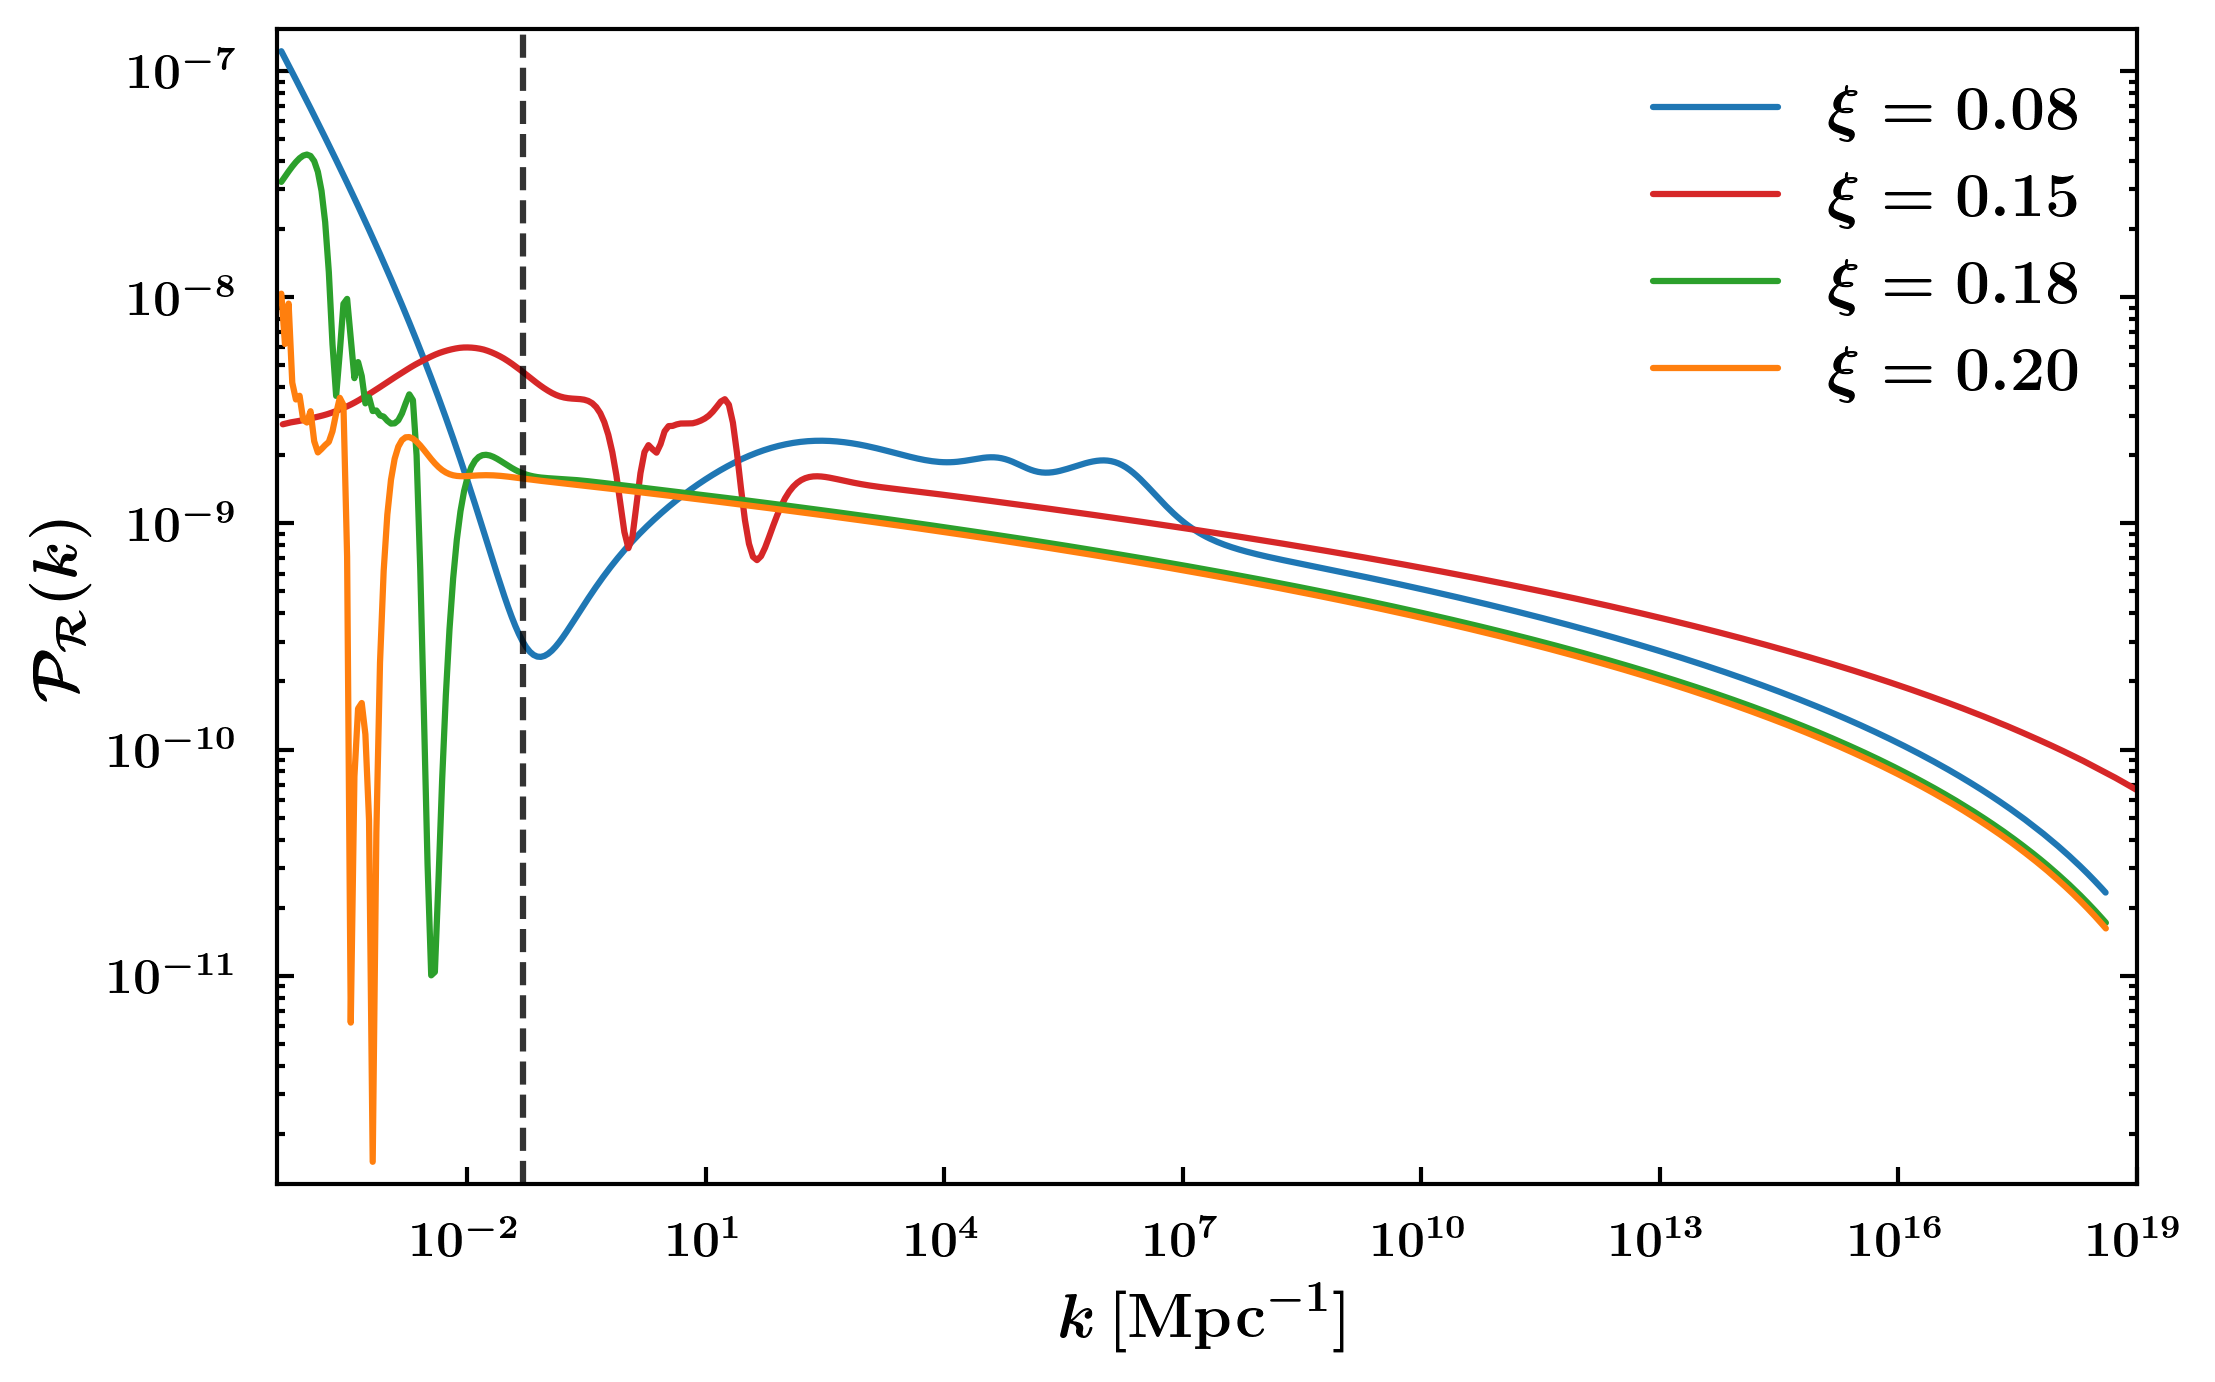

In [ ]:
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    colors = ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD']
    labels = [ r"$\xi = 0.08$", r"$\xi = 0.15$", r"$\xi = 0.18$", r"$\xi = 0.20$"]
    
    for filename, label, color in zip(file_names, labels, colors):
        df_filtered = combined_df[combined_df['Fuente'] == filename]
        plt.loglog(df_filtered['k_modes'], df_filtered['P_R(k)'],
                    label=label, color=color)
    
    plt.xlabel(r'$k \, [\mathrm{Mpc}^{-1}]$')
    plt.axvline(0.05, color='k', linestyle='--', alpha = 0.8)

    plt.ylabel(r'$\mathcal{P}_{\mathcal{R}}(k)$')
    plt.legend()
    plt.xlim([4e-5, 1e19]) 
    savefig('spectra')
    
else:
    print("❌ No se pudo cargar ningún archivo.")


In [8]:
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    colors = ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD']
    labels = [r"$h_0 = 10^{-4} M_p$", r"$ h_0 = 10^{-9} M_p$", r"$ h_0 = 10^{-3} M_p$", r"$h_0 = h_0^\mathrm{valley}$"]
    
    for filename, label, color in zip(file_names, labels, colors):
        df_filtered = combined_df[combined_df['Fuente'] == filename]
        plt.semilogy(df_filtered['N'], abs(df_filtered['eta_perp']),
                    label=label, color=color)
    
    # Configuración del gráfico
    plt.xlabel(r"$N_e$")
    plt.ylabel(r"$\eta_\perp$")
    plt.xlim(0, 70)
    plt.ylim(1e-6, 1)
    plt.legend()
    plt.show()
    
else:
    print("❌ No se pudo cargar ningún archivo.")


KeyError: 'N'